In [1]:
#Importing pandas and numpy libraries
import pandas as pd
import numpy as np

In [3]:
#Set the number of observations n
n = 500


In [4]:
#Creating a data frame, containing 2 variables (var1 and var2) having random values
np.random.seed(1)
df = pd.DataFrame(np.random.randn(n, 2), columns = {'var1', 'var2'})
df.head()

,var2,var1
0,1.624345,-0.611756
1,-0.528172,-1.072969
2,0.865408,-2.301539
3,1.744812,-0.761207
4,0.319039,-0.249370


In [5]:
#Creating some random noise
noise = np.random.normal(0, .2, n)

In [6]:
#Defining the class. Classes are separated by an hyperplane: var1+var2>0. Be aware that some noise is introduced in this rule
df['class'] = np.where(df.var1+df.var2+noise>0, 'class1', 'class2')
df.head()

,var2,var1,class
0,1.624345,-0.611756,class1
1,-0.528172,-1.072969,class2
2,0.865408,-2.301539,class2
3,1.744812,-0.761207,class1
4,0.319039,-0.249370,class2


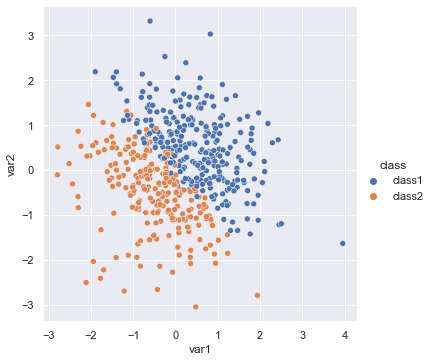

In [7]:
import seaborn as sb
sb.set(style='darkgrid')
sb.relplot(data=df, x="var1", y="var2", hue="class")

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[['var1', 'var2']], 
                                                    df['class'], 
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=109) 

In [9]:
#Import svm model
from sklearn import svm

#Create many svm Classifier, one classifier for each kernel
clf_lnr = svm.SVC(kernel='linear') # Linear Kernel
clf_ply = svm.SVC(kernel='poly') # Polynomial Kernel
clf_rbf = svm.SVC(kernel='rbf') # Radial Basis Function Kernel - Default value
clf_sgm = svm.SVC(kernel='sigmoid') # Sigmoid Kernel

#Train the model using the training sets
clf_lnr.fit(X_train, y_train)
clf_ply.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)
clf_sgm.fit(X_train, y_train)

#Predict the response for test dataset
pred_test_lnr = clf_lnr.predict(X_test)
pred_test_ply = clf_ply.predict(X_test)
pred_test_rbf = clf_rbf.predict(X_test)
pred_test_sgm = clf_sgm.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy SVM (Linear Kernel):", metrics.accuracy_score(y_test, pred_test_lnr))
print("Accuracy SVM (Polynomial Kernel):", metrics.accuracy_score(y_test, pred_test_ply))
print("Accuracy SVM (Radial Kernel):", metrics.accuracy_score(y_test, pred_test_rbf))
print("Accuracy SVM (Sigmoid Kernel):", metrics.accuracy_score(y_test, pred_test_sgm))

Accuracy SVM (Linear Kernel): 0.9466666666666667
Accuracy SVM (Polynomial Kernel): 0.8933333333333333
Accuracy SVM (Radial Kernel): 0.94
Accuracy SVM (Sigmoid Kernel): 0.8733333333333333


In [11]:
test = X_test.loc[:,:]
test['class'] = y_test
test['pred'] = pred_test_lnr
test.head()

,var1,var2,class,pred
45,0.185156,1.198918,class1,class1
259,1.107175,0.181039,class1,class1
284,0.081768,-1.398813,class2,class2
496,0.718291,0.385602,class1,class1
224,1.458108,-0.384832,class1,class1


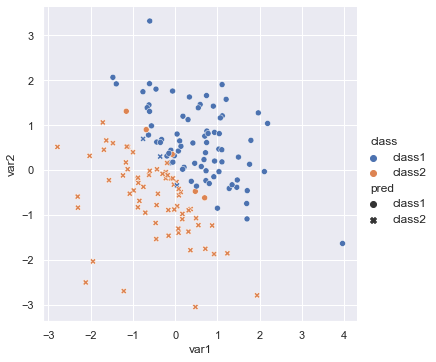

In [12]:
sb.relplot(data=test, x="var1", y="var2", hue="class", style="pred")